# NLP Project
## Past A: IMDb Movie Review Sentiment Analysis
#### Video Link: [here](https://drive.google.com/file/d/1tu_Ilvs7po3eynQsHHD9DE1YFbjbPKzb/view?usp=sharing)
### 1. Data Exploration and Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#### Checking for missing values

In [ ]:
filepath = r'E:\Online_Course\NLP\Projects\data_imdb.csv'
df = pd.read_csv(filepath)
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


#### Analysing sentiment distribution

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


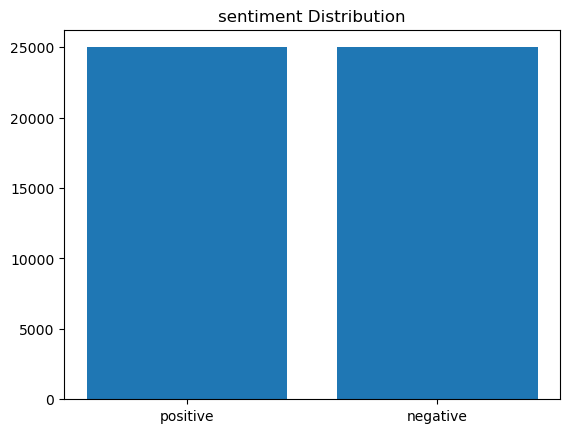

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("sentiment Distribution")
plt.show()

#### Analysing review lengths

count    50000.000000
mean      1309.367720
std        989.759532
min          7.000000
25%        699.000000
50%        970.000000
75%       1590.000000
max      13704.000000
Name: Review_Length, dtype: float64


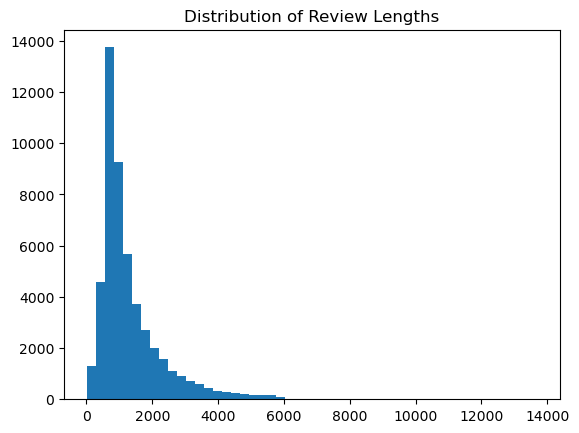

In [ ]:
df['Review_Length'] = df['review'].apply(len)
print(df['Review_Length'].describe())
plt.hist(df['Review_Length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()

#### Removing Stopwords, punctuation and special charaters also tokenizing

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text) 
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(cleaned_tokens)


df['cleaned_text'] = df['review'].apply(clean_text) 
print(df.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  
0  One reviewers mentioned watching Oz episode yo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  Basically theres family little boy Jake thinks...  
4  Petter Matteis Love Time Money visually stunni...  


#### Lemmatization and Stemming

In [ ]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['cleaned_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

stemmer = PorterStemmer()
df['stemmed_text'] = df['cleaned_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

print(df[['cleaned_text', 'lemmatized_text', 'stemmed_text']].head())

                                        cleaned_text  \
0  One reviewers mentioned watching Oz episode yo...   
1  wonderful little production br br filming tech...   
2  thought wonderful way spend time hot summer we...   
3  Basically theres family little boy Jake thinks...   
4  Petter Matteis Love Time Money visually stunni...   

                                     lemmatized_text  \
0  One reviewer mentioned watching Oz episode you...   
1  wonderful little production br br filming tech...   
2  thought wonderful way spend time hot summer we...   
3  Basically there family little boy Jake think t...   
4  Petter Matteis Love Time Money visually stunni...   

                                        stemmed_text  
0  one review mention watch oz episod youll hook ...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic there famili littl boy jake think there ...  
4  petter mattei love time money visual stun film..

#### Vectorization using Bag of Words

In [ ]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df['lemmatized_text']) 
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 2. Feature Enginerring
#### Numerical extraction using TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

   able  absolutely  across  act  acted    acting    action  actor    actors  \
0   0.0         0.0     0.0  0.0    0.0  0.000000  0.000000    0.0  0.000000   
1   0.0         0.0     0.0  0.0    0.0  0.000000  0.000000    0.0  0.104208   
2   0.0         0.0     0.0  0.0    0.0  0.000000  0.000000    0.0  0.000000   
3   0.0         0.0     0.0  0.0    0.0  0.000000  0.000000    0.0  0.000000   
4   0.0         0.0     0.0  0.0    0.0  0.066856  0.090738    0.0  0.000000   

   actress  ...     years  yes  yet      york     youll     young  younger  \
0      0.0  ...  0.000000  0.0  0.0  0.000000  0.096981  0.000000      0.0   
1      0.0  ...  0.000000  0.0  0.0  0.000000  0.000000  0.000000      0.0   
2      0.0  ...  0.120068  0.0  0.0  0.000000  0.000000  0.131995      0.0   
3      0.0  ...  0.000000  0.0  0.0  0.000000  0.000000  0.000000      0.0   
4      0.0  ...  0.000000  0.0  0.0  0.126477  0.000000  0.000000      0.0   

      youre  youve    zombie  
0  0.000000    0.0 

#### Extracting Textual Features
- word count
- charater count
- average word length

In [ ]:
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_text'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']
print(df[['cleaned_text', 'word_count', 'char_count', 'avg_word_length']].head())

                                        cleaned_text  word_count  char_count  \
0  One reviewers mentioned watching Oz episode yo...         170        1166   
1  wonderful little production br br filming tech...          90         674   
2  thought wonderful way spend time hot summer we...          87         589   
3  Basically theres family little boy Jake thinks...          70         468   
4  Petter Matteis Love Time Money visually stunni...         130         876   

   avg_word_length  
0         6.858824  
1         7.488889  
2         6.770115  
3         6.685714  
4         6.738462  


#### Combined features(used for model training) 

In [ ]:
combined_features = np.hstack([tfidf_features.toarray(), df[['word_count', 'char_count', 'avg_word_length']].values])
feature_columns = [f'TF-IDF_{i+1}' for i in range(tfidf_features.shape[1])] + ['word_count', 'char_count', 'avg_word_length']
combined_features_df = pd.DataFrame(combined_features, columns=feature_columns)
print(combined_features_df.head())

   TF-IDF_1  TF-IDF_2  TF-IDF_3  TF-IDF_4  TF-IDF_5  TF-IDF_6  TF-IDF_7  \
0       0.0       0.0       0.0       0.0       0.0  0.000000  0.000000   
1       0.0       0.0       0.0       0.0       0.0  0.000000  0.000000   
2       0.0       0.0       0.0       0.0       0.0  0.000000  0.000000   
3       0.0       0.0       0.0       0.0       0.0  0.000000  0.000000   
4       0.0       0.0       0.0       0.0       0.0  0.066856  0.090738   

   TF-IDF_8  TF-IDF_9  TF-IDF_10  ...  TF-IDF_994  TF-IDF_995  TF-IDF_996  \
0       0.0  0.000000        0.0  ...    0.000000    0.096981    0.000000   
1       0.0  0.104208        0.0  ...    0.000000    0.000000    0.000000   
2       0.0  0.000000        0.0  ...    0.000000    0.000000    0.131995   
3       0.0  0.000000        0.0  ...    0.000000    0.000000    0.000000   
4       0.0  0.000000        0.0  ...    0.126477    0.000000    0.000000   

   TF-IDF_997  TF-IDF_998  TF-IDF_999  TF-IDF_1000  word_count  char_count  \
0       

### 3. Model Development
#### Building and training the model

In [ ]:
X = combined_features  
y = df['sentiment']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=2000)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

### 4. Model Evaluation

In [ ]:
y_pred = model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_test, y_pred),2)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4961
    positive       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### Evaluation Interpretation
- Overall Accuracy: 0.86
    - The model correctly predicted the sentiment 86% of the time
    - For sentiment analysis tasks, this is a good performance metric, especially for binary classification.
- Negative Sentiment:
    - Precision(0.87) : A high precision indicates that the model makes fewer "false positive" errors for negative reviews.
    - Recall(0.85): Out of all actual negative reviews, the model correctly identified 85% of them.
    - F1-Score(0.86): An F1-score of 0.86 indicates good, balanced performance for the "negative" class.
- Positive Sentiment:
    - Precision(0.86): Out of all reviews predicted as "positive," 86% were actually positive.
    - Recall(0.88): This slightly higher recall for positive reviews suggests the model is more sensitive to identifying positive sentiment.
    - F1-Score(0.87): Indicates strong performance in predicting the "positive" class.
- Macro Average:
    - Weighted Avg (Precision: 0.86, Recall: 0.86, F1-Score: 0.86)
    - The weighted average accounts for the class imbalance (slightly more positive reviews than negative reviews)



#### Key Take-aways
- Balanced Performance: The model performs well on both positive and negative sentiments, with precision, recall, and F1-scores being comparable.
- High Precision and Recall: Both metrics are relatively high, indicating the model is effective at predicting sentiment correctly without being overly biased or missing too many samples.
- Potential Improvements:
    - If your use case requires higher sensitivity for one class, consider fine-tuning the model further.\
    - For example, using a different threshold for prediction probabilities or applying oversampling/undersampling techniques for imbalanced datasets.


